# Machine Learning Project

## Franklin Abreu PID: 6134148

## Problem

The problem that we are trying to solve is the task where we train a model that can differentiate between sonar signals bounced off a metal cylinder and those bounced off from a roughly cylindrical rock.

## Motivation

The motivation for this is to be be able to distinguish between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock. 

## Data Set Information

We have `sonar.mines` which contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at several different angles and under varying conditions.

We have `sonar.rocks` which contains 97 patterns obtained from rocks under similiar conditions.

The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a numerous amount of different aspect angles, which range from 90 degrees for the metal cylinder and 180 degrees for the rocks.

Each pattern is a set of 60 numbers in the range of 0.0 to 1.0. This numbers represent the energy within a particular frequency band, integrated over a period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The labels associated with each record are labeled either "R" for rocks or "M" if it's a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but the angle is not encoded explicitly.


In [2]:
from __future__ import print_function
import os

# Data
import pandas as pd
import numpy as np

# Graphing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


# Metrics
from sklearn.metrics import (roc_curve, precision_recall_curve, confusion_matrix, accuracy_score,
                            precision_score, recall_score, f1_score, classification_report, roc_auc_score)

# Warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
data_path = ['data']
filepath = os.sep.join(data_path + ['sonar.all-data.csv'])
data = pd.read_csv(filepath, sep=',', header=None)

# rename target column to label
data.rename(columns={60: "label"}, inplace=True)

In [4]:
# show first 5 rows
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
# Describe the data
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


For the shape of the data, there are 208 rows (111 belong to `mines` (metal cylinders) and 97 belong to `rocks`) and there are 61 columns (60 are for each pattern and the last one is our target column, which differentiates between M:`mines` and R:`rocks`).

In [6]:
# Shape of data
data.shape

(208, 61)

For the data types, 60 columns will be `float64` because they are measuring the energy within a particular frequency band, integrated over a certain period of time, and the odd one out is the target column which is `object`.

In [7]:
# Data types
data.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
56       float64
57       float64
58       float64
59       float64
label     object
Length: 61, dtype: object

Check that number of patterns is correct.

In [8]:
data["label"].value_counts()

M    111
R     97
Name: label, dtype: int64

## Plot the Data

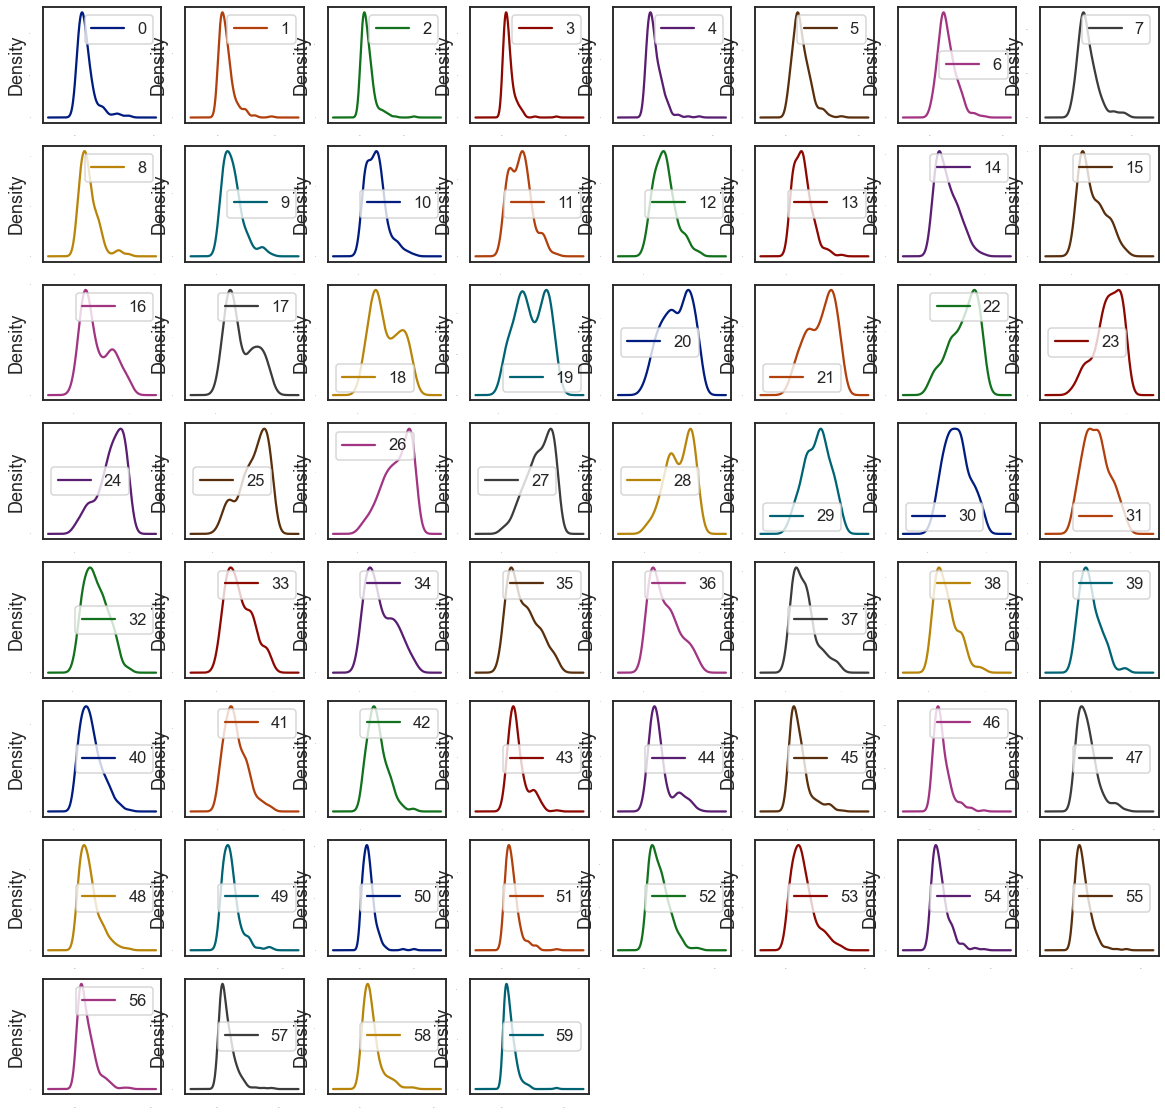

In [9]:
sns.set_context("talk")
sns.set_style("white")
sns.set_palette("dark")

fig = plt.figure(figsize=(20,20))
ax = plt.axes()
data.plot(kind="density", subplots=True,
          sharex=False, sharey=False,
          layout=(8,8), ax=ax, fontsize=1);

## Feature Processing

We go ahead and split the features and the target column, and then use `train_test_split` to divide the features into training and testing data.

In [10]:
feature_cols = data.columns[:-1]
x_data = data[feature_cols]
y_data = data["label"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

The data is divided into a 70/30 split between the training set and the testing set.

## ML Model Development

### First Model: KNN

We will start with KNN by trying to find the optimal configuration of neighbors.

In [11]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

param_grid = {"n_neighbors": [1,3,5,7,9,11,13,15,17,19,21]}
scoring = "accuracy"
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid=param_grid, scoring=scoring)

grid.fit(x_scaled, y_train)

print(f"Best: {grid.best_score_} params: {grid.best_params_}")

mean = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params  = grid.cv_results_['params']
for mean, stds, params in zip(mean, stds, params):
    print(f"{mean} ({stds}) with {params}")

Best: 0.8 params: {'n_neighbors': 1}
0.8 (0.08558395617924726) with {'n_neighbors': 1}
0.7517241379310344 (0.08831895499907375) with {'n_neighbors': 3}
0.7034482758620689 (0.08613790342618483) with {'n_neighbors': 5}
0.6620689655172415 (0.07033130363576255) with {'n_neighbors': 7}
0.6758620689655171 (0.0888558532877595) with {'n_neighbors': 9}
0.6827586206896552 (0.07679674983213823) with {'n_neighbors': 11}
0.689655172413793 (0.05770069148510864) with {'n_neighbors': 13}
0.6827586206896551 (0.0506790981265485) with {'n_neighbors': 15}
0.675862068965517 (0.04137931034482758) with {'n_neighbors': 17}
0.6896551724137931 (0.057700691485108674) with {'n_neighbors': 19}
0.6758620689655173 (0.10367790605774417) with {'n_neighbors': 21}


Best configuration for KNN is K=1 because it gives the highest test score compared to the other values of `n_neighbors`.

### Second Model: Gaussian Naive-Bayes

Now we will try fitting GaussianNB to the data set.

In [12]:
gnb = GaussianNB()
cv_N = 4
scores = cross_val_score(gnb, x_train, y_train, n_jobs=cv_N, cv=cv_N)
print(f"Gaussian mean score: {scores.mean()}, std: {scores.std()}")

Gaussian mean score: 0.6820570570570571, std: 0.07156293041628829


## Prediction/Result

We will check the prediction for KNN.

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_scaled, y_train)

x_test_scaled = scaler.transform(x_test)
knn_predict = knn.predict(x_test_scaled)

Now we will check the prediction for GaussianNB.

In [14]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_predict = gnb.predict(x_test)

## Evaluating the result/metrics (Including Graphs)

First we will start by going over the results of our K-Nearest Neighbors model, and look specifically look at the `accuracy_score` and the `classification report`.

In [21]:
labels = sorted(y_test.unique())
cm = pd.DataFrame(confusion_matrix(y_test, knn_predict, labels=labels), columns=labels, index=labels)

knn_metrics = {
    "acc": accuracy_score(y_test, knn_predict),
    "cm": cm,
    "clf": classification_report(y_test, knn_predict)
}
print(f"KNN Accuracy: {knn_metrics['acc']}")
print(f"Classification Report:\n {knn_metrics['clf']}")

KNN Accuracy: 0.9365079365079365
Classification Report:
               precision    recall  f1-score   support

           M       0.97      0.91      0.94        35
           R       0.90      0.96      0.93        28

    accuracy                           0.94        63
   macro avg       0.93      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63



Cnnfusion Matrix graph for KNN.

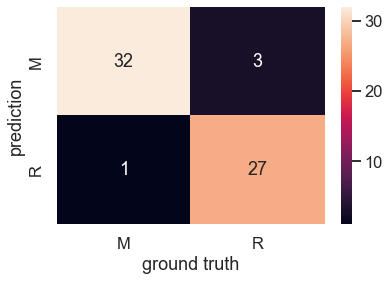

In [16]:
sns.set_context("talk")
ax = sns.heatmap(knn_metrics["cm"], annot=True, fmt="d", xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_ylabel("prediction")
ax.set_xlabel("ground truth");

Now we go over the `accuracy_score` and `classification report` of GaussianNB.

In [20]:
labels = sorted(y_test.unique())
cm = pd.DataFrame(confusion_matrix(y_test, gnb_predict, labels=labels), columns=labels, index=labels)


gnb_metrics = {
    "acc": accuracy_score(y_test, gnb_predict),
    "cm": cm ,
    "clf": classification_report(y_test, gnb_predict)
}
print(f"Gaussian Accuracy: {gnb_metrics['acc']}")
print(f"Classification Report:\n {gnb_metrics['clf']}")

Gaussian Accuracy: 0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

           M       0.92      0.66      0.77        35
           R       0.68      0.93      0.79        28

    accuracy                           0.78        63
   macro avg       0.80      0.79      0.78        63
weighted avg       0.82      0.78      0.78        63



Confusion Matrix graph for GaussianNB.

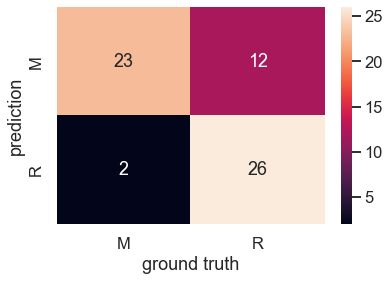

In [18]:
sns.set_context("talk")
ax = sns.heatmap(gnb_metrics["cm"], annot=True, fmt="d", xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_ylabel("prediction")
ax.set_xlabel("ground truth");

## Conclusion

We can see that KNN has a higher accuracy in its prediction compared to GaussianNB (`0.935 vs 0.778`). The confusion matrices shows that KNN mislabels both rocks and mines at a lower rate than GaussianNB.